In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma

We start with the following equation:
$$ dX = aXdt+\sigma X dW_t+\gamma dW'_t+\epsilon,$$
where $\epsilon = \mathbb{E}(dx_0)-dx_0$ is a correction term to reduce the variance:
$$dX = aXdt+\sigma X dW_t -\sigma x_0 dW_t = aXdt+\sigma (X- x_0) dW_t$$
Letting $Y = X-x_0$ we see that $dY = a(Y+x_0)dt+\sigma Y dW_t$ satisfies the inhomogeneous geometric brownian motion SDE:
$$dY = \lambda(\mu - Y)dt+\sigma Y dW_t$$
with $\lambda = -a$ and $\mu=-x_0$.

The solution to this is SDE is given in analytical form by
$$Y_t = e^{-(\lambda+\sigma^2/2)t+\sigma W_t}(y_0+\lambda\mu\int_0^t e^{(\lambda+\sigma^2/2)s-\sigma W_s}ds)$$
or with $y_0 = 0$, 
$$X_t =x_0+ax_0\int_0^t e^{(a-\sigma^2/2)(t-s)+\sigma (W_t-W_s)}ds$$

In turn, if $\lambda+\sigma^2/2 >0$ (or $\sigma^2/2>a$), then $Y$ converges to a stationary distribution $Y_\infty$.  Here
$$Y_\infty\sim IG(1+2\lambda/\sigma^2, 2\lambda\mu/\sigma^2)$$ 
is inverse-gamma distributed with scale $\beta = 2\lambda\mu/\sigma^2=2ax_0/\sigma^2$ and shape $\alpha = 1+2\lambda/\sigma^2=1-2a/\sigma^2$. The corresponding probablility density function is
$${\frac {\beta ^{\alpha }}{\Gamma (\alpha )}}x^{-\alpha -1}\exp \left(-{\frac {\beta }{x}}\right)$$

In [56]:
a = 1
sig = 2
x_0=1

In [57]:
alpha = 1-2*a/(sig**2)
beta = 2*a*x_0/(sig**2)
rv = invgamma(alpha, loc = x_0, scale=beta)

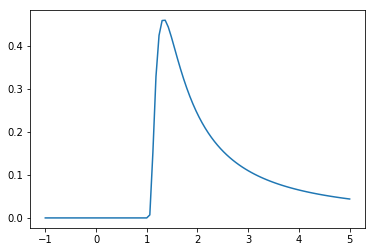

In [58]:
x_tmp = np.linspace(-1,5, 100)
plt.plot(x_tmp, rv.pdf(x_tmp))

In [102]:
n = 5000
dt = 0.1

In [103]:
samples = 3000
white_noise = np.random.normal(loc=0, scale=np.sqrt(dt), size = (n, samples))/dt
W = np.cumsum(dt*white_noise[:,:], axis = 0)

In [104]:
s = np.arange(0, n*dt, dt).reshape([n,1])
T = n*dt
X = np.cumsum(dt*np.exp((a-(sig**2)/2)*(T - s) + sig*(W[-1,:] - W)), axis = 0)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03488575, 0.69771498, 0.93755451,
        0.78056864, 0.67155067, 0.54508983, 0.48840049, 0.34885749,
        0.30525031, 0.31833246, 0.30961102, 0.32269318, 0.22239665,
        0.21803593, 0.17442875, 0.17442875, 0.1875109 , 0.16134659,
        0.13518228, 0.14826443, 0.1177394 , 0.13518228, 0.13518228,
        0.0697715 , 0.12646084, 0.07849294, 0.06105006, 0.08285365,
        0.06105006, 0.07849294, 0.07413222, 0.04796791, 0.08285365]),
 array([-1.  , -0.88, -0.76, -0.64, -0.52, -0.4 , -0.28, -0.16, -0.04,
         0.08,  0.2 ,  0.32,  0.44,  0.56,  0.68,  0.8 ,  0.92,  1.04,
         1.16,  1.28,  1.4 ,  1.52,  1.64,  1.76,  1.88,  2.  ,  2.12,
         2.24,  2.36,  2.48,  2.6 ,  2.72,  2.84,  2.96,  3.08,  3.2 ,
         3.32,  3.44,  3.56,  3.68

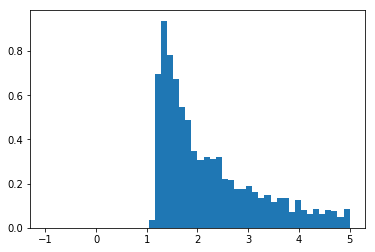

In [105]:
plt.hist(X[-1,:], bins=50, density=True, range=(-1,5))

Now let's look at a related process, given by:
$$X_t =\rho\int_0^t e^{(a-\sigma^2/2)(t-s)+\sigma (W_t-W_s)}dV_s,$$
where $W_s$ and $V_s$ are independent brownian motions. At any point in time, the marginal distribution is a mixture of Gaussians, and the process converges to a stationary mixture of Gaussians. With $\rho=1$, we can sample the marginal as follows:

In [106]:
dV = np.random.normal(loc=0, scale=np.sqrt(dt), size = (n, samples))/dt

In [107]:
X = np.cumsum(dV*np.exp((a-(sig**2)/2)*(T - s) + sig*(W[-1,:] - W)), axis = 0)

(array([0.00646109, 0.00587372, 0.00646109, 0.00646109, 0.00646109,
        0.00969163, 0.00939794, 0.01350954, 0.01292217, 0.01556535,
        0.02202643, 0.03465492, 0.04405286, 0.04258443, 0.05580029,
        0.05785609, 0.05521292, 0.03994126, 0.02701909, 0.0287812 ,
        0.0143906 , 0.01703377, 0.01145374, 0.01086637, 0.0082232 ,
        0.00998532, 0.00910426, 0.00851689, 0.00440529, 0.00528634]),
 array([-25.        , -23.33333333, -21.66666667, -20.        ,
        -18.33333333, -16.66666667, -15.        , -13.33333333,
        -11.66666667, -10.        ,  -8.33333333,  -6.66666667,
         -5.        ,  -3.33333333,  -1.66666667,   0.        ,
          1.66666667,   3.33333333,   5.        ,   6.66666667,
          8.33333333,  10.        ,  11.66666667,  13.33333333,
         15.        ,  16.66666667,  18.33333333,  20.        ,
         21.66666667,  23.33333333,  25.        ]),
 <a list of 30 Patch objects>)

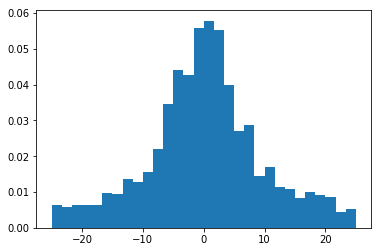

In [108]:
plt.hist(X[-1,:], bins=30, density=True, range=(-25,25))